# Week 2: Gradient Descent

### 강경훈

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
inv = np.linalg.inv

### 오늘의 주인공

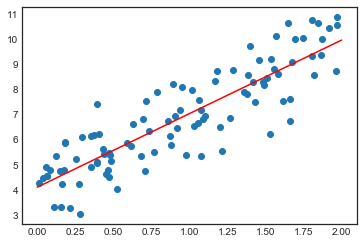

In [3]:
# generate toy regression sample data
N = 100
X = 2 * np.random.rand(N, 1)
t = 4 + 3* X + np.random.randn(100, 1)

Q = np.c_[np.ones((N, 1)), X]
w_mle = inv(Q.T @ Q) @ Q.T @ t

X_range = np.array([[0],[2]])
X_range_ = np.c_[np.ones((2, 1)), X_range]
reg_line = X_range_ @ w_mle

plt.scatter(X,t)
plt.plot(X_range, reg_line, '-r')

In [4]:
w_mle

array([[4.10790443],
       [2.92585037]])

### 우리가 타는 미끄럼틀

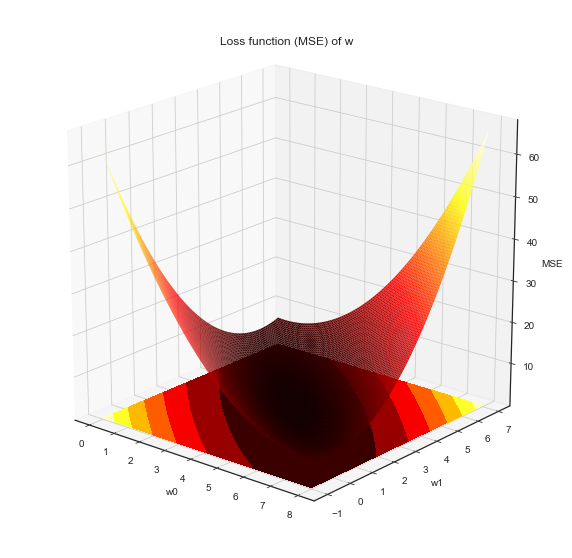

In [5]:
w0 = np.linspace(0, 8, 100)
w1 = np.linspace(-1, 7, 100)
W0, W1 = np.meshgrid(w0, w1)

l = np.array( [np.linalg.norm(t - Q @ np.matrix([w0, w1]).reshape(-1,1)) **2/N for w0, w1 in zip(np.ravel(W0), np.ravel(W1))] )[:,np.newaxis]
L = l.reshape(W0.shape)

#Plot the result in 3D
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(W0, W1, L, rstride=1, cstride=1, linewidth=1, antialiased=True, cmap='hot')
ax.set_xlabel('w0'); ax.set_ylabel('w1'); ax.set_zlabel('MSE')
cset = ax.contourf(W0, W1, L, zdir='z', offset=-0.15, cmap='hot')

# Adjust the limits, ticks and view angle
ax.view_init(20, -50)
ax.set_title('Loss function (MSE) of w')

plt.show()

### Batch Gradient Descent

매 단계마다 100개 데이터 전체에 대하여 계산을 한다. 이 경우 데이터도 100개밖에 안 되고 설명변수도 하나라 전체 데이터에 대한 loss의 gradient를 구하는게 쉽지, 실제로는 굉장히 시간이 많이 걸린다.

점프 간격 eta를 만져보고 수렴을 잘 하나 한번 보자.

[[4.10790443]
 [2.92585037]]


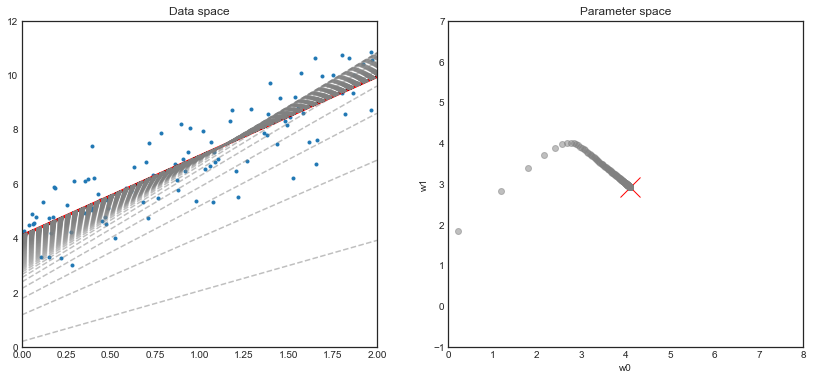

In [6]:
eta = 0.1 # try 0.0001, 0.5, ...
n_iterations = 1000

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121)
ax1.plot(X, t, marker='.', linestyle='')
ax1.set(xlim=(0,2), ylim=(0,12), title='Data space')
ax1.plot(X_range, reg_line, color='red', linewidth=3)

ax2 = fig.add_subplot(122)
ax2.set(xlim=(0,8), ylim=(-1,7), title='Parameter space')
ax2.plot(w_mle[0], w_mle[1], marker='x', color='red', markersize=20)
ax2.set_xlabel('w0'); ax2.set_ylabel('w1')

w = np.random.randn(2,1)
ax2.plot(w[0], w[1], marker='o', color='red')

for i in range(n_iterations):
    # graient
    gradients = -2/N * (t - Q@w).T @ Q # goes through entire training data
    
    # Update w
    w = w - eta * gradients.T
    
    # plot each step
    gd_reg_line = X_range_ @ w
    ax1.plot(X_range, gd_reg_line, linestyle="--", color='grey', alpha=0.5)
    ax2.plot(w[0], w[1], marker='o', color='grey', alpha=0.5)

print(w)

### Stochastic Gradient Descent

Batch는 어디로 가는지 확실히 아니까 직선으로 제대로 가는데, Stochastic은 우리네 청춘처럼 헛발질을 많이 한다. 그래도 어째저째 집까지 잘 찾아가는 감동적인 녀석..

[[4.15951641]
 [2.91437551]]


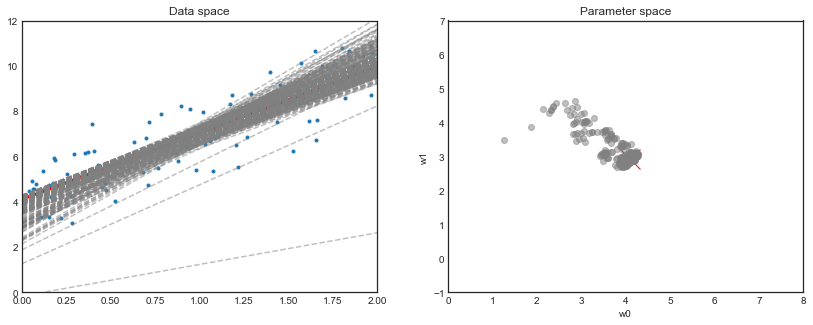

In [9]:
n_epochs = 50
t0, t1 = 5, 50

def learning(t):
    return t0 / (t+t1)

fig = plt.figure(figsize=(14, 5))

ax1 = fig.add_subplot(121)
ax1.plot(X, t, marker='.', linestyle='')
ax1.set(xlim=(0,2), ylim=(0,12), title='Data space')
ax1.plot(X_range, reg_line, color='red', linewidth=3)

ax2 = fig.add_subplot(122)
ax2.set(xlim=(0,8), ylim=(-1,7), title='Parameter space')
ax2.plot(w_mle[0], w_mle[1], marker='x', color='red', markersize=20)
ax2.set_xlabel('w0'); ax2.set_ylabel('w1')

w = np.random.randn(2,1)
ax2.plot(w[0], w[1], marker='o', color='red')

for epoch in range(n_epochs):
    for i in range(N):
        # graient
        n = np.random.randint(N, size=1)
        q = Q[n,:].reshape(-1,1)
        ti = t[n].copy()
        gradients = -2 * (ti - w.T @ q) * q
    
        # Update w
        eta = learning(epoch *N + i)
        w = w - eta * gradients
    
        # plot each step
        gd_reg_line = X_range_ @ w
        ax1.plot(X_range, gd_reg_line, linestyle="--", color='grey', alpha=0.5)
        ax2.plot(w[0], w[1], marker='o', color='grey', alpha=0.5)
    
print(w)